# Tarea 1
## Estudiante Janneth Eulalia Calderon Peña
### Métodos Estocásticos
### Maestría en Recursos Hidráulicos
Importanto las Librerias 

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Cargar los datos 

In [8]:
df = pd.read_csv("SMwr_Ex_01.txt", sep="\t") #el \t es el separador de cada columna
display (df)

,Dato,A,B
0,1,1.70,1.30
1,2,6.26,17.02
2,3,7.56,19.74
3,4,7.92,12.01
4,5,0.96,0.66
5,6,2.47,1.80
6,7,2.55,15.91
7,8,0.28,0.62
8,9,1.34,2.15
9,10,0.71,2.07


In [53]:
#Viendo las columnas 
df.columns

Index(['Dato', 'A', 'B '], dtype='object')

In [54]:
#corrijamos el error en B
df.rename(columns={'B ': 'B'}, inplace=True)


Desplegando la información 

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dato    20 non-null     int64  
 1   A       20 non-null     float64
 2   B       20 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 612.0 bytes


Ahoras las estadísticas basicas 

In [56]:
df.describe()

,Dato,A,B
count,20.00000,20.000000,20.000000
mean,10.50000,3.459500,5.763500
std,5.91608,3.123666,6.078203
min,1.00000,0.090000,0.240000
25%,5.75000,0.982500,1.675000
50%,10.50000,2.510000,2.955000
75%,15.25000,5.720000,7.370000
max,20.00000,10.270000,19.740000


1. Haga un histograma de A con anchura de clases de 1, 2 y 5 unidades. ¿Qué fracción de los datos tiene 
valores entre 5 y 10? 

La anchura del histograma depende del número de bins de la siguiente manera:

$$
bins = \frac{v_{max} - v_{min}}{ancho}
$$

Donde $v_{max}$ es el valor maximo,  $v_{max}$ el valor minimo y $ancho$ es la anchura deseada 




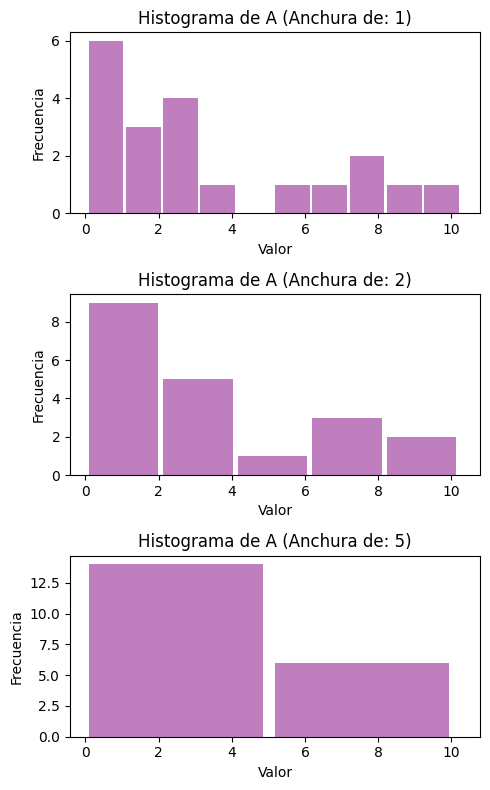

In [57]:
anchos = [1,2,5]
max_A = df['A'].max()
min_A = df['A'].min()
fig, ax = plt.subplots(3,1,figsize=(5,8)) #matriz de graficos nxm n=nummero de filas y m numero de columnas
for indice,ancho in enumerate(anchos):
    bins_=int((max_A-min_A)/ancho )
    ax[indice].hist(df['A'],bins = bins_, width=0.95*ancho, color='purple',alpha=0.5)#alpha para transprencia
    ax[indice].set_title(f"Histograma de A (Anchura de: {ancho})")
    ax[indice].set_xlabel('Valor')
    ax[indice].set_ylabel('Frecuencia')

plt.tight_layout() #separa las graficas
plt.show() #muestra graficos

Ahora calculemos la fracción de los datos entre 5 y 10, para esto utilicemos una mascara boleana 

In [58]:
mascara = (df['A']>5) & (df['A']<10) #valores mayores a 5 y menores a 10 
# valores en (5,10)
print('Valores entre (5,10)')
display(df['A'][mascara])
print(f'\nPorcentaje:\n{len(df[mascara])/(len(df['A']))*100}%')#saca el porcentaje de datos entre 5 y 10 con respecto al conjunto A


Valores entre (5,10)


1     6.26
2     7.56
3     7.92
12    8.71
18    5.54
Name: A, dtype: float64


Porcentaje:
25.0%


2. Haga un histograma de B con anchura de clases de 1, 2 y 5 unidades. ¿Qué fracción de los datos tiene 
valores entre 10 y 15? 

Para B realizamos el mismo procesos  

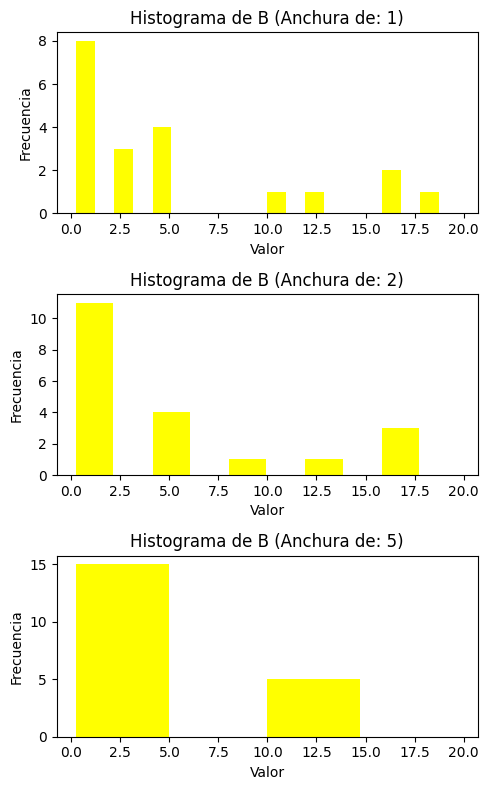

In [59]:
anchos = [1,2,5]
max_B = df['B'].max()
min_B = df['B'].min()
fig, ax = plt.subplots(3,1,figsize=(5,8))
for indice,ancho in enumerate(anchos):
    bins_=int((max_A-min_A)/ancho )
    ax[indice].hist(df['B'],bins = bins_, width=0.95*ancho, color='yellow')
    ax[indice].set_title(f"Histograma de B (Anchura de: {ancho})")
    ax[indice].set_xlabel('Valor')
    ax[indice].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [62]:
mascara = (df['B']>10) & (df['B']<15) #valores mayores a 5 y menores a 10 
# valores en (5,10)
print('Valores entre (10,15)')
display(df['B'][mascara])
print(f'\nPorcentaje:\n{len(df[mascara])/(len(df['B']))*100}%')

Valores entre (10,15)


3     12.01
12    11.72
Name: B, dtype: float64


Porcentaje:
10.0%


3. Construya la distribución acumulativa de A y B.

La probabilidad acumulativa para una variable discreta esta dada por:
$$
p(x)=\sum_{i=0}^{n}f(x_i)
$$

donde $f(x_i)$ es la frecuencia relativa para el dato $x_i$ y esta dada por 

$$
f(x_i)=\frac{\text{Numero de ocurrencia de} \;x_i}{\text{Numero de elementos}}
$$

por tanto para calcular la probabilidad acumulativa 

In [60]:
# calculo de frecuencia relativa

frecuencia = df['A'].value_counts()
frecuencia

A
1.70     1
6.26     1
5.54     1
2.96     1
10.27    1
0.99     1
0.62     1
0.09     1
8.71     1
2.99     1
1.66     1
0.71     1
1.34     1
0.28     1
2.55     1
2.47     1
0.96     1
7.92     1
7.56     1
3.61     1
Name: count, dtype: int64

Como vemos cada dato solo aparece una vez entonces mejor calculamos la frecuencia en un intervalo dado. 

In [67]:
ancho_inter=1
frecuencia=[]
frecuencias_relativas = []
intervalo = []
for i in range(np.ceil(max_A).astype(int)):
    datos_intervalo = df[(df['A'] >= i) & (df['A'] <= i+ancho_inter)]
    frecuencia.append(len(datos_intervalo))
    frecuencia_relativa = frecuencia[i] /len(df)
    frecuencias_relativas.append(frecuencia_relativa)
    intervalo.append([i,i+1])
print('frecuencia\n', frecuencia)
print('frecuencia relativas\n',frecuencias_relativas)
print('intervalos\n',intervalo)


frecuencia
 [6, 3, 4, 1, 0, 1, 1, 2, 1, 0, 1]
frecuencia relativas
 [0.3, 0.15, 0.2, 0.05, 0.0, 0.05, 0.05, 0.1, 0.05, 0.0, 0.05]
intervalos
 [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11]]


Ya teniendo las frecuencias relativas podemos calcular la probabilidas acumulada 

In [68]:
probabilidades_acumuladas = []
acumulada = 0
for frecuencia in frecuencias_relativas:
    acumulada += frecuencia
    probabilidades_acumuladas.append(acumulada)
print('Probabilidad acumulada de A\n')
probabilidades_acumuladas

Probabilidad acumulada de A



[0.3,
 0.44999999999999996,
 0.6499999999999999,
 0.7,
 0.7,
 0.75,
 0.8,
 0.9,
 0.9500000000000001,
 0.9500000000000001,
 1.0]

Ahora la graficamos 

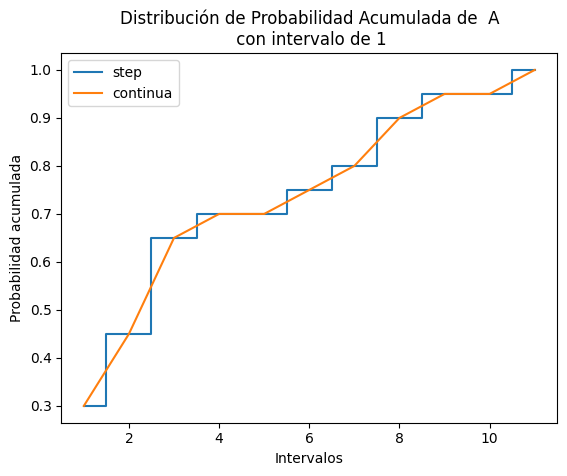

In [69]:
x= np.arange(1,len(probabilidades_acumuladas)+1)
plt.step(x, probabilidades_acumuladas, where='mid', label='step')
plt.plot(x, probabilidades_acumuladas,label='continua')
plt.xlabel('Intervalos')
plt.ylabel('Probabilidad acumulada')
plt.title(f'Distribución de Probabilidad Acumulada de \
 A\n con intervalo de {ancho_inter}')
plt.legend()
plt.show()

Ahora lo mismo para B

frecuencia
 [4, 2, 4, 1, 1, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1]
frecuencia relativas
 [0.2, 0.1, 0.2, 0.05, 0.05, 0.15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.05, 0.0, 0.0, 0.05, 0.0, 0.05, 0.0, 0.05]
intervalos
 [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 14], [14, 15], [15, 16], [16, 17], [17, 18], [18, 19], [19, 20]]
Probabilidad acumulada de B
A
 con intervalo de 1
[0.2, 0.30000000000000004, 0.5, 0.55, 0.6000000000000001, 0.7500000000000001, 0.7500000000000001, 0.7500000000000001, 0.7500000000000001, 0.7500000000000001, 0.7500000000000001, 0.8000000000000002, 0.8500000000000002, 0.8500000000000002, 0.8500000000000002, 0.9000000000000002, 0.9000000000000002, 0.9500000000000003, 0.9500000000000003, 1.0000000000000002]


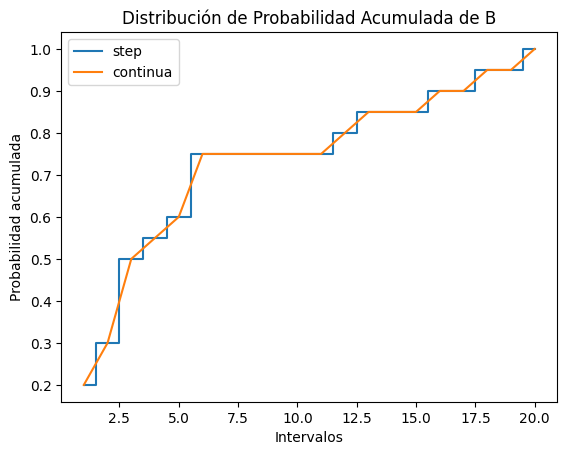

In [76]:
ancho_inter=1
frecuencia=[]
frecuencias_relativas = []
intervalo = []
for i in range(np.ceil(max_B).astype(int)):
    datos_intervalo = df[(df['B'] >= i) & (df['B'] <= i+ancho_inter)]
    frecuencia.append(len(datos_intervalo))
    frecuencia_relativa = frecuencia[i] /len(df)
    frecuencias_relativas.append(frecuencia_relativa)
    intervalo.append([i,i+1])
print('frecuencia\n', frecuencia)
print('frecuencia relativas\n',frecuencias_relativas)
print('intervalos\n',intervalo)

probabilidades_acumuladas = []
acumulada = 0
for frecuencia in frecuencias_relativas:
    acumulada += frecuencia
    probabilidades_acumuladas.append(acumulada)
print(f'Probabilidad acumulada de B\n\
A\n con intervalo de {ancho_inter}')
print (f'{probabilidades_acumuladas}')

x= np.arange(1,len(probabilidades_acumuladas)+1)
plt.step(x, probabilidades_acumuladas, where='mid', label='step')
plt.plot(x, probabilidades_acumuladas,label='continua')
plt.xlabel('Intervalos')
plt.ylabel('Probabilidad acumulada')
plt.title('Distribución de Probabilidad Acumulada de B')
plt.legend()
plt.show()

4. Calcule la media, la varianza, la asimetría, la curtosis, los cuantiles, la mediana y el rango intercuartílico 
de A y B.

para esto utilizamos las funciones de pandas

In [117]:
# Media
media_A = df['A'].mean()
media_B = df['B'].mean()

# Varianza
varianza_A = df['A'].var()
varianza_B = df['B'].var()

# Asimetría
asimetria_A = df['A'].skew()
asimetria_B = df['B'].skew()

# Curtosis
curtosis_A = df['A'].kurtosis()
curtosis_B = df['B'].kurtosis()

# Cuantiles
cuantiles_A = np.percentile(df['A'], [25, 50, 75])
cuantiles_B = np.percentile(df['B'], [25, 50, 75])

# Mediana
mediana_A = df['A'].median()
mediana_B = df['B'].median()

# Rango intercuartílico
rango_intercuartilico_A = np.percentile(df['A'], 75) - np.percentile(df['A'], 25)
rango_intercuartilico_B = np.percentile(df['B'], 75) - np.percentile(df['B'], 25)

# Imprimir resultados
print("Columna A:")
print(f"Media: {media_A}")
print(f"Varianza: {varianza_A}")
print(f"Asimetría: {asimetria_A}")
print(f"Curtosis: {curtosis_A}")
print(f"Cuantiles: {cuantiles_A}")
print(f"Mediana: {mediana_A}")
print(f"Rango intercuartílico: {rango_intercuartilico_A}")

print("\nColumna B:")
print(f"Media: {media_B}")
print(f"Varianza: {varianza_B}")
print(f"Asimetría: {asimetria_B}")
print(f"Curtosis: {curtosis_B}")
print(f"Cuantiles: {cuantiles_B}")
print(f"Mediana: {mediana_B}")
print(f"Rango intercuartílico: {rango_intercuartilico_B}")


Columna A:
Media: 3.4595
Varianza: 9.757289210526315
Asimetría: 0.924440152119806
Curtosis: -0.39661299371365155
Cuantiles: [0.9825 2.51   5.72  ]
Mediana: 2.51
Rango intercuartílico: 4.7375

Columna B:
Media: 5.7635000000000005
Varianza: 36.94455026315789
Asimetría: 1.2337329908292198
Curtosis: 0.2679922051758554
Cuantiles: [1.675 2.955 7.37 ]
Mediana: 2.955
Rango intercuartílico: 5.695


5. Dibuje un diagrama de caja y bigotes de los valores de A y B. ¿Hay posibles valores atípicos?

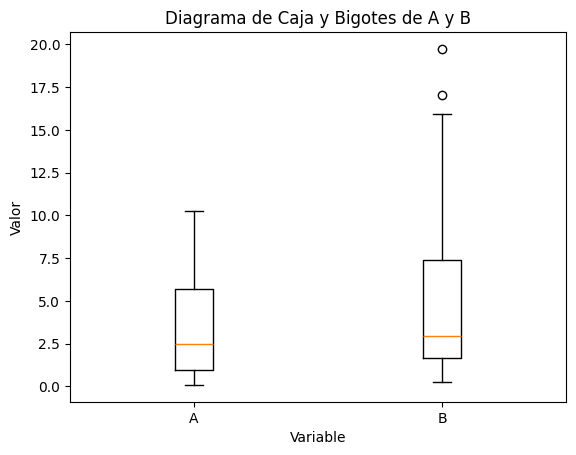

In [72]:
plt.boxplot(df[['A','B']],labels=['A', 'B'])

# Agregar título y etiquetas
plt.title('Diagrama de Caja y Bigotes de A y B')
plt.xlabel('Variable')
plt.ylabel('Valor')
plt.show()

Si hay dos posibles valores atípicos en B.

6. Suponga que A es la concentración de algún contaminante en el suelo (mg/kg). Supongamos que las 
muestras se han tomado aleatoriamente del sitio de interés. Si la concentración crítica es de 5 mg/kg y 
el sitio tiene 8000 m2. ¿Qué área aproximada del sitio debe ser limpiada? 

Teniendo en cuenta que la distribución de probabilidad acumulada para el valor de 5mg/kg es de 0.7 por tanto la probabilidad de que un valor sea mayor es de 0.3, entonces el 30% del área total puede estar afectada, es decir 8000m2 * 0.3

In [77]:
Area_afectada=8000*0.3
print(f'El Area afectada es:{Area_afectada} m2')


El Area afectada es:2400.0 m2


7. Suponga que B es la concentración de algún contaminante en el suelo (mg/kg). Supongamos que las muestras se han tomado aleatoriamente del sitio de interés. Si la concentración crítica es de 10 mg/kg y el sitio tiene 8000 m2. ¿Qué área aproximada del sitio debe ser limpiada?

Teniendo en cuenta que la distribución de probabilidad acumulada para el valor de 10mg/kg es de 0.75 por tanto la probabilidad de que un valor sea mayor es de 0.25, entonces el 25% del área total puede estar afectada, es decir 8000m2 * 0.25

In [78]:
Area_afectada=8000*0.25
print(f'El Area afectada es:{Area_afectada} m2')

El Area afectada es:2000.0 m2


8. Calcule el coeficiente de correlación entre A y B.

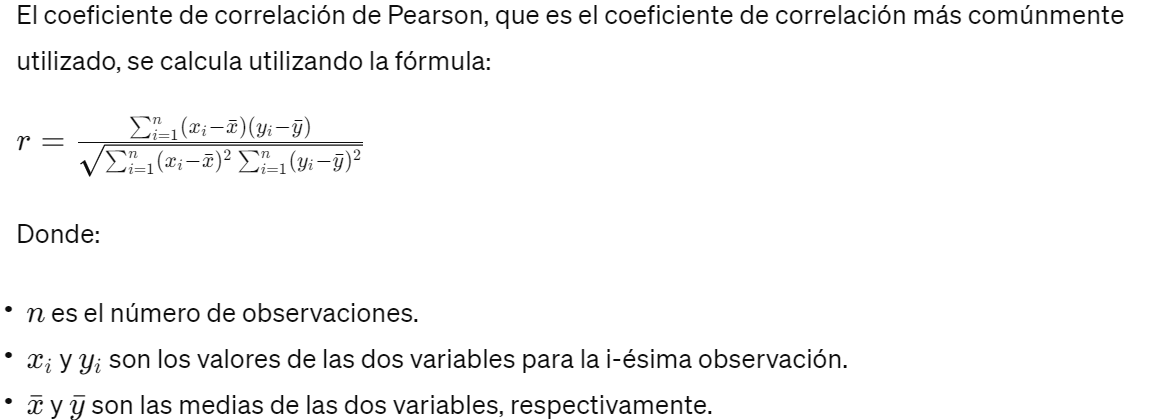

In [82]:
# Calcular el coeficiente de correlación entre las columnas A y B
correlation = df['A'].corr(df['B'])

print(f'Coeficiente de correlación entre A y B: {correlation:.3f}')# :.2f define 3decimales

Coeficiente de correlación entre A y B: 0.674


9. ¿Qué fracción de los datos tiene un valor A menor que 5 y un valor B menor que 10? ?

In [90]:
# Filtrar el DataFrame para obtener solo las filas que cumplan con las condiciones
filas_cumplen = df[(df['A'] < 5) & (df['B'] < 10)]

# Calcular la fracción de estas filas con respecto al total de filas
fraccion = len(filas_cumplen) / len(df)
print('Filas que cumple la condicion')
display (filas_cumplen)

print("Fracción de los datos con A < 5 y B < 10 es:\n", fraccion)

Filas que cumple la condicion


,Dato,A,B
0,1,1.70,1.30
4,5,0.96,0.66
5,6,2.47,1.80
7,8,0.28,0.62
8,9,1.34,2.15
9,10,0.71,2.07
10,11,1.66,4.68
11,12,2.99,2.74
13,14,0.09,0.24
14,15,0.62,2.30


Fracción de los datos con A < 5 y B < 10 es:
 0.65


10. ¿Qué fracción de los datos tiene un valor A menor que 5 o un valor B menor que 10?

In [92]:
# Filtrar el DataFrame para obtener solo las filas que cumplan con la condición
filas_cumplen = df[(df['A'] < 5) | (df['B'] < 10)]

# Calcular la fracción de estas filas con respecto al total de filas
fraccion = len(filas_cumplen) / len(df)
print('Filas que cumple la condicion')
display (filas_cumplen)
print("Fracción de los datos con A < 5 o B < 10 es:\n", fraccion)

Filas que cumple la condicion


,Dato,A,B
0,1,1.70,1.30
4,5,0.96,0.66
5,6,2.47,1.80
6,7,2.55,15.91
7,8,0.28,0.62
8,9,1.34,2.15
9,10,0.71,2.07
10,11,1.66,4.68
11,12,2.99,2.74
13,14,0.09,0.24


Fracción de los datos con A < 5 o B < 10 es:
 0.8
